In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import autokeras as ak

In [2]:
from sklearn import tree

In [3]:
df = pd.read_excel('./농넷_영주시_일별사과.xlsx')

In [4]:
from pycaret.classification import *

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df['등급명'])
df['등급명'] = encoder.transform(df['등급명'])
df

,DATE,거래단위,평균가격(원),총거래물량(kg),총거래금액(원),시장명,법인명,품목명,품종명,산지명,산지시군명,등급명
0,2024-03-13,10.0,62366.666667,1800.0,11226000,서울가락도매,동화청과,사과,미시마,경상북도,영주시,3
1,2024-03-13,10.0,95000.000000,3840.0,36480000,서울가락도매,서울청과,사과,후지,경상북도,영주시,3
2,2024-03-13,10.0,60900.000000,1200.0,7308000,수원도매시장,경기청과,사과,미얀마,경북,영주시,3
3,2024-03-13,10.0,61300.000000,600.0,3678000,인천삼산도매,경인농산,사과,미시마,경상북도,영주시,3
4,2024-03-13,20.0,152875.568182,3520.0,26906100,안동도매시장,안동청과,사과,미얀마,경북,영주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65184,2020-01-03,10.0,24833.333333,2400.0,5960000,서울가락도매,농협가락(공),사과,미안마,경북,영주시,3
65185,2020-01-03,10.0,20000.000000,300.0,600000,서울가락도매,농협가락(공),사과,후지,경북,영주시,3
65186,2020-01-03,18.0,25200.000000,2700.0,3780000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3
65187,2020-01-03,18.0,25200.000000,1620.0,2268000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3


In [6]:
df_temp = df[['등급명', '총거래금액(원)','거래단위']]
df_temp

,등급명,총거래금액(원),거래단위
0,3,11226000,10.0
1,3,36480000,10.0
2,3,7308000,10.0
3,3,3678000,10.0
4,0,26906100,20.0
...,...,...,...
65184,3,5960000,10.0
65185,3,600000,10.0
65186,3,3780000,18.0
65187,3,2268000,18.0


In [7]:
df_temp.isnull().sum()

등급명         0
총거래금액(원)    0
거래단위        0
dtype: int64

In [8]:
import numpy as np
# scikit-learn에서 R의 MICE 패키지를 따라서 실험적으로 개발 중
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
df_temp.isnull().sum()

등급명         0
총거래금액(원)    0
거래단위        0
dtype: int64

In [12]:
s = setup(df_temp, target = '등급명')

,Description,Value
0,Session id,7649
1,Target,등급명
2,Target type,Multiclass
3,Original data shape,"(65189, 3)"
4,Transformed data shape,"(65189, 3)"
5,Transformed train set shape,"(45632, 3)"
6,Transformed test set shape,"(19557, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [13]:
#pycaret
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(df_temp, target = '등급명')

,Description,Value
0,Session id,2084
1,Target,등급명
2,Target type,Regression
3,Original data shape,"(65189, 3)"
4,Transformed data shape,"(65189, 3)"
5,Transformed train set shape,"(45632, 3)"
6,Transformed test set shape,"(19557, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [14]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:23:59
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6936,0.8412,0.6936,0.6749,0.6451,0.5365,0.5633,0.5060
xgboost,Extreme Gradient Boosting,0.6934,0.8400,0.6934,0.6602,0.6456,0.5366,0.5631,0.2390
gbc,Gradient Boosting Classifier,0.6931,0.8434,0.6931,0.6659,0.6444,0.5357,0.5628,1.1790
ada,Ada Boost Classifier,0.6630,0.8014,0.6630,0.5793,0.5757,0.4793,0.5153,0.1180
lda,Linear Discriminant Analysis,0.6611,0.8286,0.6611,0.6297,0.5717,0.4758,0.5158,0.0190
qda,Quadratic Discriminant Analysis,0.6559,0.8048,0.6559,0.5526,0.5729,0.4696,0.5004,0.0110
ridge,Ridge Classifier,0.6557,0.0000,0.6557,0.4796,0.5504,0.4644,0.5084,0.0110
rf,Random Forest Classifier,0.5862,0.7864,0.5862,0.5765,0.5807,0.4016,0.4020,0.7290
et,Extra Trees Classifier,0.5861,0.7473,0.5861,0.5796,0.5818,0.4026,0.4033,0.5310
dt,Decision Tree Classifier,0.5840,0.7171,0.5840,0.5789,0.5802,0.4000,0.4009,0.0230


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6258,0.6956,0.8340,0.5843,0.4227,0.2572,0.3230
lightgbm,Light Gradient Boosting Machine,0.6233,0.6972,0.8349,0.5833,0.4228,0.2572,0.1330
xgboost,Extreme Gradient Boosting,0.6235,0.7020,0.8378,0.5805,0.4237,0.2581,0.0590
ada,AdaBoost Regressor,0.6913,0.7339,0.8567,0.5614,0.4533,0.2371,0.0670
lr,Linear Regression,0.7452,0.7942,0.8911,0.5254,0.4424,0.3009,0.0190
ridge,Ridge Regression,0.7452,0.7942,0.8911,0.5254,0.4424,0.3009,0.0180
lar,Least Angle Regression,0.7452,0.7942,0.8911,0.5254,0.4424,0.3009,0.0160
br,Bayesian Ridge,0.7452,0.7942,0.8911,0.5254,0.4425,0.3008,0.0170
en,Elastic Net,0.7615,0.8057,0.8976,0.5185,0.4546,0.2832,0.0170
llar,Lasso Least Angle Regression,0.7755,0.8290,0.9105,0.5046,0.4655,0.2720,0.0170


In [ ]:
print(best)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8410, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:

# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

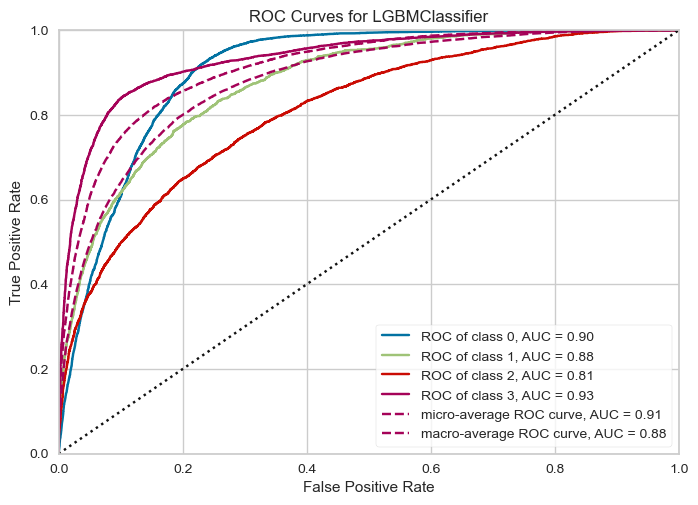

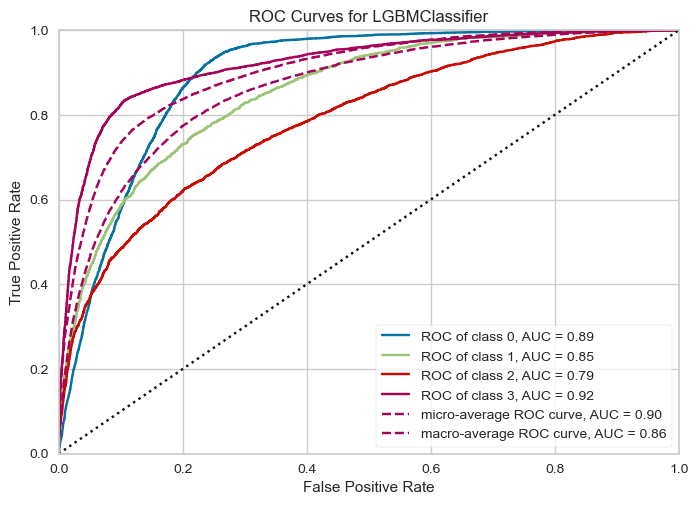

In [ ]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
s.plot_model(best, plot = 'auc')

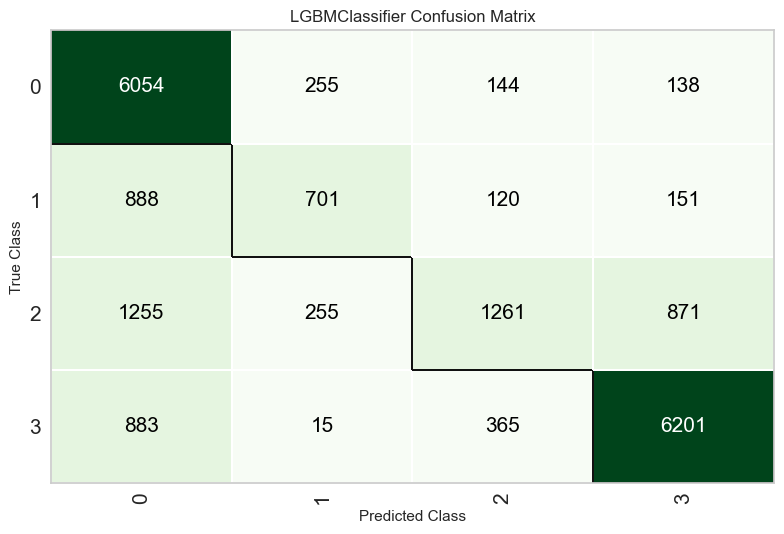

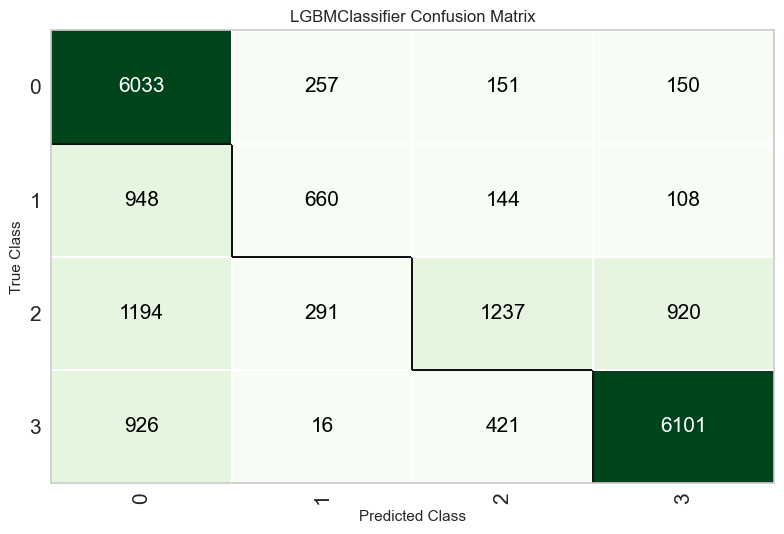

In [ ]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [ ]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7270,0.8943,0.7270,0.7248,0.7078,0.5960,0.6082


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7174,0.8799,0.7174,0.7125,0.6981,0.5824,0.5941


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label,prediction_score
60417,140.0,30857.142578,432000,10.0,2,3,0.5576
16400,840.0,43142.855469,1812000,20.0,0,0,0.4813
26561,2400.0,26206.250000,6289500,10.0,3,3,0.9470
35240,1670.0,33526.945312,5599000,10.0,3,3,0.9451
34256,600.0,24833.333984,1490000,10.0,3,3,0.7997
...,...,...,...,...,...,...,...
22967,300.0,28000.000000,420000,20.0,0,0,0.5569
40010,20.0,21500.000000,21500,20.0,0,0,0.8151
27597,3150.0,6320.000000,7963200,2.5,3,3,0.9075
64021,340.0,5426.470703,184500,10.0,2,2,0.6624


In [ ]:

# functional API
predictions = predict_model(best, data=df_temp)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7281,0.8941,0.7281,0.7269,0.7096,0.5979,0.6102


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7281,0.8941,0.7281,0.7269,0.7096,0.5979,0.6102


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label,prediction_score
0,1800.0,62366.667969,11226000,10.0,3,3,0.9176
1,3840.0,95000.000000,36480000,10.0,3,3,0.9817
2,1200.0,60900.000000,7308000,10.0,3,3,0.9206
3,600.0,61300.000000,3678000,10.0,3,3,0.8524
4,3520.0,152875.562500,26906100,20.0,0,0,0.6379


In [ ]:
# functional API
predictions = predict_model(best, data=df_temp, raw_score=True)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7281,0.8941,0.7281,0.7269,0.7096,0.5979,0.6102


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7281,0.8941,0.7281,0.7269,0.7096,0.5979,0.6102


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2,prediction_score_3
0,1800.0,62366.667969,11226000,10.0,3,3,0.0371,0.0030,0.0423,0.9176
1,3840.0,95000.000000,36480000,10.0,3,3,0.0128,0.0006,0.0050,0.9817
2,1200.0,60900.000000,7308000,10.0,3,3,0.0355,0.0034,0.0405,0.9206
3,600.0,61300.000000,3678000,10.0,3,3,0.0157,0.0085,0.1234,0.8524
4,3520.0,152875.562500,26906100,20.0,0,0,0.6379,0.0626,0.0231,0.2763


In [ ]:
# functional API
save_model(best, 'my_best_apple')

# OOP API
s.save_model(best, 'my_best_apple')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['총거래물량(kg)', '평균가격(원)', '총거래금액(원)',
                                              '거래단위'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, imp

In [ ]:
# functional API
loaded_model = load_model('my_best_apple')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_apple')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\jhi08\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['총거래물량(kg)', '평균가격(원)', '총거래금액(원)',
                                             '거래단위'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Tra...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                   

In [ ]:
#automl framework
from pycaret.regression import *
s = setup(df_temp, target = '등급명')

,Description,Value
0,Session id,3697
1,Target,등급명
2,Target type,Regression
3,Original data shape,"(65189, 5)"
4,Transformed data shape,"(65189, 5)"
5,Transformed train set shape,"(45632, 5)"
6,Transformed test set shape,"(19557, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(df_temp, target = '등급명')

,Description,Value
0,Session id,6487
1,Target,등급명
2,Target type,Regression
3,Original data shape,"(65189, 5)"
4,Transformed data shape,"(65189, 5)"
5,Transformed train set shape,"(45632, 5)"
6,Transformed test set shape,"(19557, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6000,0.6666,0.8163,0.6018,0.4107,0.2491,0.4460
lightgbm,Light Gradient Boosting Machine,0.5937,0.6684,0.8174,0.6007,0.4105,0.2471,0.0900
xgboost,Extreme Gradient Boosting,0.5960,0.6879,0.8292,0.5891,0.4155,0.2521,0.2040
ada,AdaBoost Regressor,0.6904,0.7250,0.8514,0.5669,0.4511,0.2386,0.0690
lr,Linear Regression,0.7257,0.7686,0.8766,0.5408,0.4349,0.3043,0.6210
ridge,Ridge Regression,0.7257,0.7686,0.8766,0.5408,0.4349,0.3043,0.0140
lar,Least Angle Regression,0.7257,0.7686,0.8766,0.5408,0.4349,0.3043,0.0120
br,Bayesian Ridge,0.7257,0.7686,0.8766,0.5408,0.4349,0.3043,0.0120
en,Elastic Net,0.7451,0.7844,0.8856,0.5314,0.4474,0.2859,0.0130
llar,Lasso Least Angle Regression,0.7634,0.8161,0.9033,0.5125,0.4598,0.2760,0.0120


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6050,0.6727,0.8201,0.5991,0.4128,0.2510,0.4490
lightgbm,Light Gradient Boosting Machine,0.5983,0.6738,0.8208,0.5984,0.4125,0.2488,0.0930
xgboost,Extreme Gradient Boosting,0.6012,0.6962,0.8343,0.5850,0.4181,0.2536,0.0470
ada,AdaBoost Regressor,0.7014,0.7396,0.8599,0.5592,0.4547,0.2421,0.0630
lr,Linear Regression,0.7291,0.7756,0.8806,0.5377,0.4369,0.3045,0.0140
ridge,Ridge Regression,0.7291,0.7756,0.8806,0.5377,0.4369,0.3045,0.0120
lar,Least Angle Regression,0.7291,0.7756,0.8806,0.5377,0.4369,0.3045,0.0130
br,Bayesian Ridge,0.7291,0.7756,0.8806,0.5377,0.4369,0.3045,0.0130
en,Elastic Net,0.7483,0.7914,0.8895,0.5283,0.4493,0.2862,0.0150
llar,Lasso Least Angle Regression,0.7669,0.8231,0.9072,0.5094,0.4617,0.2767,0.0120


In [ ]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=6487, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

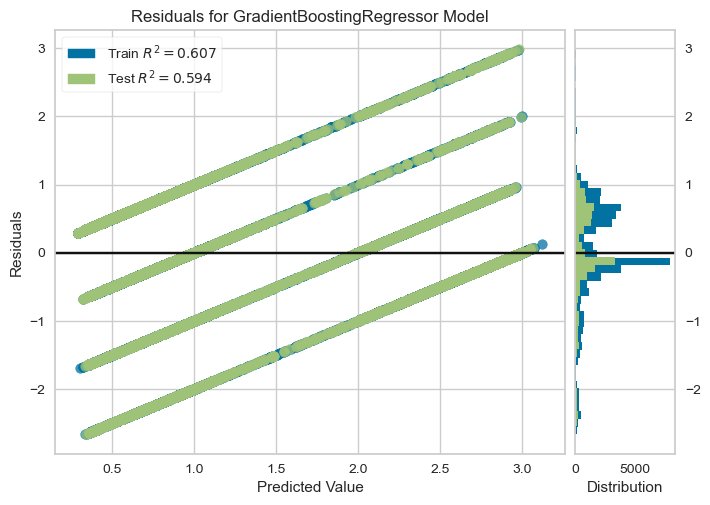

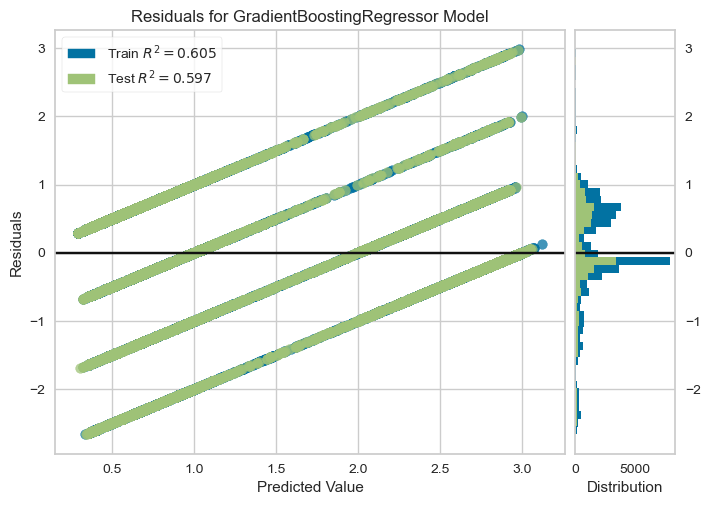

In [ ]:
# functional API
plot_model(best)

# OOP API
s.plot_model(best)


In [ ]:

# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.6058,0.6797,0.8244,0.5941,0.4125,0.2510


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.6015,0.6715,0.8195,0.5972,0.4107,0.2496


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label
17820,200.0,46010.000000,460100,20.0,3,0.496317
34558,440.0,34127.273438,750800,20.0,2,0.685972
11404,80.0,98350.000000,393400,20.0,0,0.606179
20310,90.0,10000.000000,90000,10.0,3,2.066883
41978,1590.0,19283.019531,3066000,10.0,3,2.845317
...,...,...,...,...,...,...
1130,1200.0,62125.000000,7455000,10.0,3,2.821476
51988,560.0,49107.144531,1375000,20.0,0,0.665266
48394,900.0,11222.222656,1010000,10.0,3,2.616373
6006,120.0,60000.000000,360000,20.0,0,0.491359


In [ ]:
# functional API
predictions = predict_model(best, data=df_temp)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.6008,0.6649,0.8154,0.6030,0.4102,0.2494


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.6008,0.6649,0.8154,0.6030,0.4102,0.2494


,총거래물량(kg),평균가격(원),총거래금액(원),거래단위,등급명,prediction_label
0,1800.0,62366.667969,11226000,10.0,3,2.828752
1,3840.0,95000.000000,36480000,10.0,3,3.054257
2,1200.0,60900.000000,7308000,10.0,3,2.828950
3,600.0,61300.000000,3678000,10.0,3,2.821917
4,3520.0,152875.562500,26906100,20.0,0,0.687866
